In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")
df = df.dropna()

In [4]:
X = df[['Temperature', 'Humidity', 'Vegetation_cover']]

In [5]:
y = df['Precipitation']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [39]:
y_pred = model.predict(X_test)

In [40]:
error = np.abs(y_pred - y_test)

In [41]:
print("Mean error:", np.mean(error))

Mean error: 2.4850462888089493


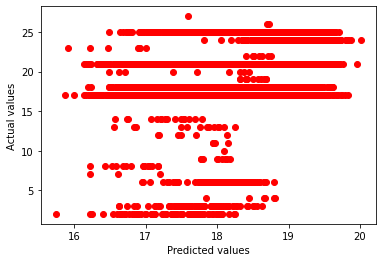

In [42]:
plt.scatter(y_pred, y_test,color='red')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv("data.csv")
df = df.dropna()

In [9]:
X = df[['Temperature', 'Humidity', 'Vegetation_cover']]

In [10]:
y = df['Precipitation']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X_train

,Temperature,Humidity,Vegetation_cover
49839,20.811111,0.58,17.7422
23605,26.966667,0.39,20.5597
26053,16.022222,0.59,22.2663
3299,-7.172222,0.79,5.1681
90469,6.144444,0.66,9.6439
...,...,...,...
6265,14.511111,0.84,5.1198
54964,-11.877778,0.85,10.7387
76963,6.755556,0.90,10.7065
860,19.161111,0.82,0.7728


In [13]:
X_test

,Temperature,Humidity,Vegetation_cover
55053,-0.555556,0.92,11.2700
27411,21.111111,0.73,20.9300
36004,16.600000,0.97,5.9731
69310,1.600000,0.82,3.2200
15875,2.194444,0.60,10.8836
...,...,...,...
70691,17.100000,0.52,16.9050
78059,15.116667,0.68,4.2182
9116,13.155556,0.44,6.4883
6672,6.311111,0.76,16.6796


In [14]:
y_train

49839    18
23605    18
26053    18
3299     17
90469    18
         ..
6265     18
54964    25
76963    18
860      18
15795    25
Name: Precipitation, Length: 76748, dtype: int64

In [15]:
y_test

55053    18
27411    17
36004    17
69310    21
15875    17
         ..
70691    17
78059    25
9116     17
6672     18
66221    17
Name: Precipitation, Length: 19188, dtype: int64

In [16]:
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1))

In [17]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [18]:
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [19]:
history

In [20]:
y_pred = model.predict(X_test)

600/600 [==============================] - 1s 1ms/step


In [32]:
y_pred = np.array(y_pred)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,22.423452
1,18.198509
2,19.564516
3,19.200020
4,17.758408
...,...
19183,17.879576
19184,17.884773
19185,17.614246
19186,18.335854


In [33]:
y_test

55053    18
27411    17
36004    17
69310    21
15875    17
         ..
70691    17
78059    25
9116     17
6672     18
66221    17
Name: Precipitation, Length: 19188, dtype: int64

In [34]:
error = np.abs(y_pred - y_test)

In [36]:
print("Mean error:", np.mean(error))

Mean error: 0       NaN
8       NaN
39      NaN
53      NaN
54      NaN
         ..
96430   NaN
96437   NaN
96444   NaN
96446   NaN
96452   NaN
Length: 19189, dtype: float64


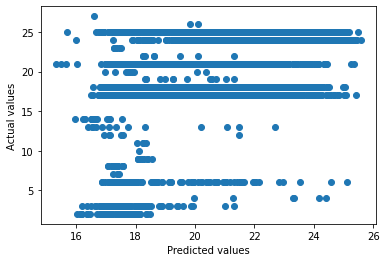

In [37]:
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()